**Question 1**

In [1]:
import cv2
import numpy as np
import os
import argparse

def process_image(image_path):

    try:
        # 1. Read an image using OpenCV
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error: Could not open or find the image at '{image_path}'")
            return

        print(f"Successfully opened image: {image_path}")

        # 2. Get the image information
        file_name = os.path.basename(image_path)
        # OpenCV does not directly provide file type from the loaded image object.
        # We'll infer it from the file extension for saving the negative.
        _, file_extension = os.path.splitext(file_name)
        file_type = file_extension.lower().lstrip('.') # e.g., 'jpg', 'png'

        height, width, channels = img.shape # img.shape gives (height, width, channels)

        # Get actual file size
        actual_file_size_bytes = os.path.getsize(image_path)
        actual_file_size_kb = actual_file_size_bytes / 1024
        actual_file_size_mb = actual_file_size_bytes / (1024 * 1024)

        print("\n--- Image Information ---")
        print(f"File Name: {file_name}")
        print(f"Inferred File Type: {file_type}")
        print(f"Dimensions: {width} x {height} pixels")
        print(f"Number of Channels: {channels} (OpenCV typically uses BGR order)")
        print(f"Actual File Size: {actual_file_size_kb:.2f} KB ({actual_file_size_mb:.2f} MB)")

        # Calculate uncompressed size (approximate)
        # For OpenCV, channels directly represent bytes per pixel for common formats (e.g., 3 for BGR, 4 for BGRA)
        bytes_per_pixel = channels
        uncompressed_size_bytes = width * height * bytes_per_pixel
        uncompressed_size_mb = uncompressed_size_bytes / (1024 * 1024)
        print(f"Approx. Uncompressed Size: {uncompressed_size_mb:.2f} MB")

        # 3. Find the compression ratio
        compression_ratio = "N/A"
        if actual_file_size_bytes > 0:
            compression_ratio = uncompressed_size_bytes / actual_file_size_bytes
            print(f"Compression Ratio (Uncompressed/Actual): {compression_ratio:.2f}:1")
        else:
            print("Compression Ratio: Cannot calculate (file size is 0).")

        # 4. Display the negative of the image
        # Invert the image by subtracting pixel values from 255
        inverted_img = 255 - img

        # Define output path for the negative image
        base_name = os.path.splitext(file_name)[0]
        negative_image_path = f"{base_name}_negative.{file_type}"
        cv2.imwrite(negative_image_path, inverted_img)
        print(f"\nNegative image saved to: {negative_image_path}")

        # Optionally, display the images (requires a GUI environment)
        # Uncomment the lines below to show the images in a pop-up window.
        # cv2.imshow("Original Image", img)
        # cv2.imshow("Negative Image", inverted_img)
        # cv2.waitKey(0) # Waits indefinitely until a key is pressed
        # cv2.destroyAllWindows() # Closes all OpenCV windows

    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # --- Instructions for Use ---
    print("--- Python Image Processor (Using OpenCV) ---")
    print("This script will process an image, display its information,")
    print("calculate a conceptual compression ratio, and save its negative.")
    print("\nTo use:")
    print("1. Make sure you have OpenCV installed: pip install opencv-python")
    print("2. Place an image file (e.g., 'my_image.jpg') in the same directory as this script,")
    print("   or provide its full path.")
    print("3. Run this script from your terminal: python your_script_name.py")
    print("4. Enter the path to your image when prompted.")
    print("---------------------------------------------\n")

    # Get image path from user input
    input_image_path = input("Enter the path to the image file: ")

    # Call the processing function
    process_image(input_image_path)


--- Python Image Processor (Using OpenCV) ---
This script will process an image, display its information,
calculate a conceptual compression ratio, and save its negative.

To use:
1. Make sure you have OpenCV installed: pip install opencv-python
2. Place an image file (e.g., 'my_image.jpg') in the same directory as this script,
   or provide its full path.
3. Run this script from your terminal: python your_script_name.py
4. Enter the path to your image when prompted.
---------------------------------------------

Enter the path to the image file: /content/Frozen Rose.jpg
Successfully opened image: /content/Frozen Rose.jpg

--- Image Information ---
File Name: Frozen Rose.jpg
Inferred File Type: jpg
Dimensions: 612 x 408 pixels
Number of Channels: 3 (OpenCV typically uses BGR order)
Actual File Size: 31.15 KB (0.03 MB)
Approx. Uncompressed Size: 0.71 MB
Compression Ratio (Uncompressed/Actual): 23.48:1

Negative image saved to: Frozen Rose_negative.jpg


**Question 2**

Enter the path to the image file for histogram plotting: /content/Frozen Rose.jpg


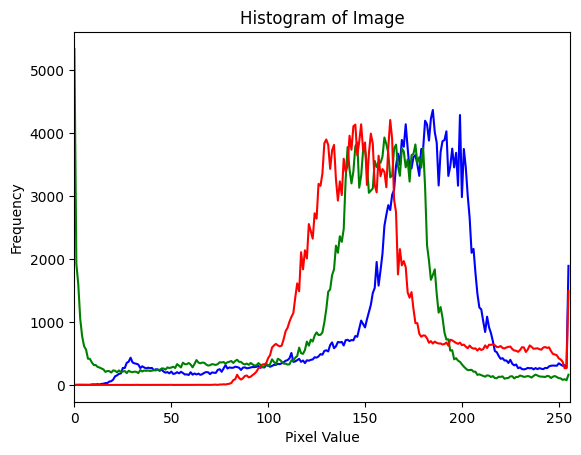

In [2]:
# Histpgram plotting of an Image

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def plot_histogram(image_path):
    """
    Reads an image and plots its histogram for each color channel.
    """
    try:
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error: Could not open or find the image at '{image_path}'")
            return

        # Calculate histogram for each channel
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.title('Histogram of Image')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.show()

    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# Get image path from user input (using the same input as before for consistency)
input_image_path = input("Enter the path to the image file for histogram plotting: ")

# Call the function to plot the histogram
plot_histogram(input_image_path)

**Question 3**

Enter image path: /content/Frozen Rose.jpg


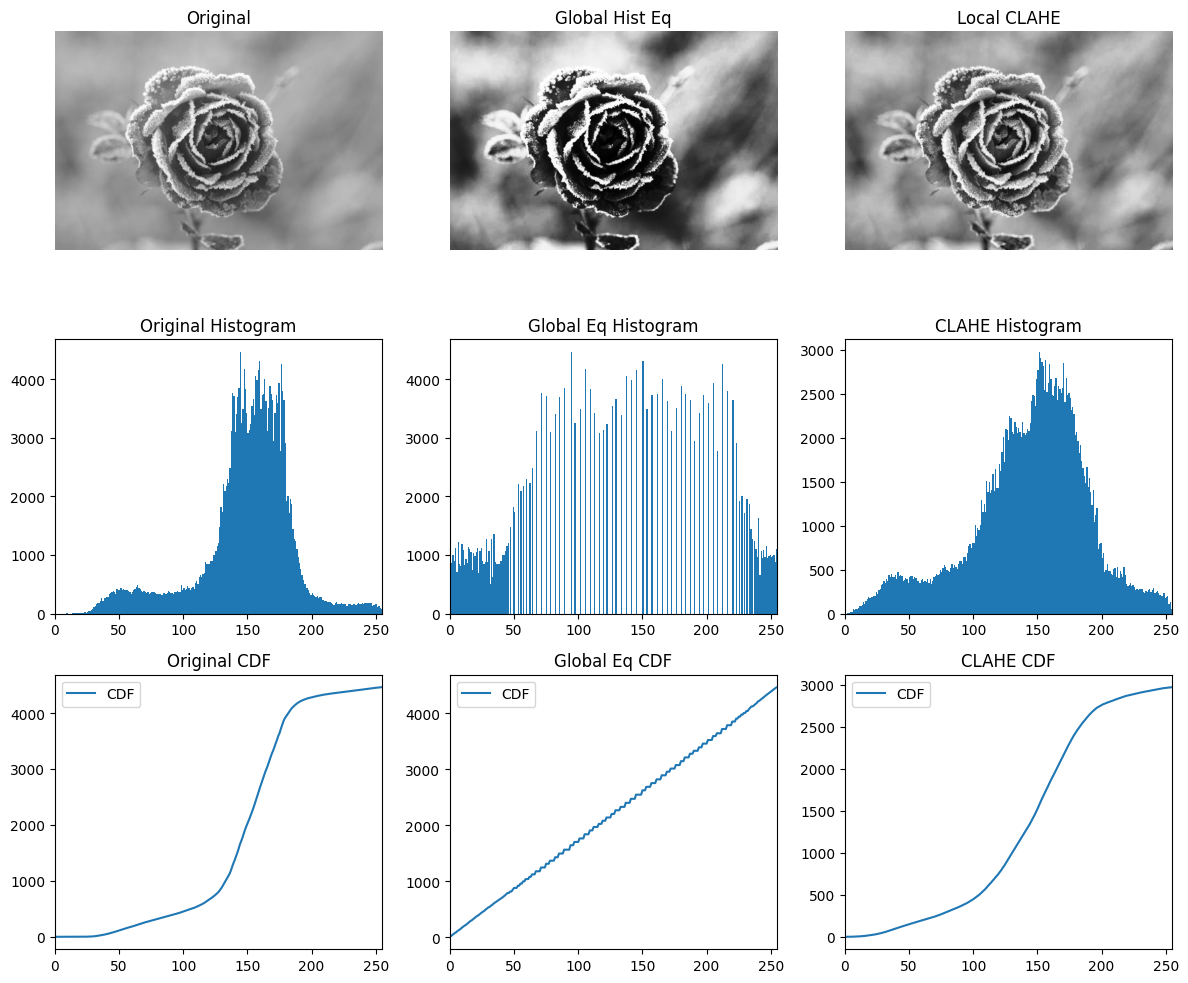

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_histogram(img, ax, title="Histogram"):
    ax.hist(img.ravel(), bins=256, range=(0, 256))
    ax.set_title(title)
    ax.set_xlim(0, 255)

def histogram_and_local_equalization_display(image_path,
                                              clahe_clip_limit=2.0,
                                              clahe_tile_grid_size=(8, 8)):
    img = cv2.imread(image_path, 0)  # grayscale
    if img is None:
        print(f"Error: Could not open or find the image at '{image_path}'")
        return

    # Global histogram equalization
    equalized = cv2.equalizeHist(img)

    # CLAHE (local)
    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit, tileGridSize=clahe_tile_grid_size)
    local_equalized = clahe.apply(img)

    # Display images
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))

    # Row 1: Images
    axes[0, 0].imshow(img, cmap="gray", vmin=0, vmax=255)
    axes[0, 0].set_title("Original")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(equalized, cmap="gray", vmin=0, vmax=255)
    axes[0, 1].set_title("Global Hist Eq")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(local_equalized, cmap="gray", vmin=0, vmax=255)
    axes[0, 2].set_title("Local CLAHE")
    axes[0, 2].axis("off")

    # Row 2: Histograms
    show_histogram(img, axes[1, 0], title="Original Histogram")
    show_histogram(equalized, axes[1, 1], title="Global Eq Histogram")
    show_histogram(local_equalized, axes[1, 2], title="CLAHE Histogram")

    # Row 3: Cumulative distribution (optional, shows equalization effect)
    def cdf_plot(img, ax, title):
        hist, bins = np.histogram(img.flatten(), 256, [0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()
        ax.plot(cdf_normalized, label="CDF")
        ax.set_title(title)
        ax.set_xlim(0, 255)
        ax.legend()

    cdf_plot(img, axes[2, 0], "Original CDF")
    cdf_plot(equalized, axes[2, 1], "Global Eq CDF")
    cdf_plot(local_equalized, axes[2, 2], "CLAHE CDF")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    img_path = input("Enter image path: ").strip()
    histogram_and_local_equalization_display(img_path)


**Question 4**

Enter the path to the image file for local histogram equalization: /content/Frozen Rose.jpg


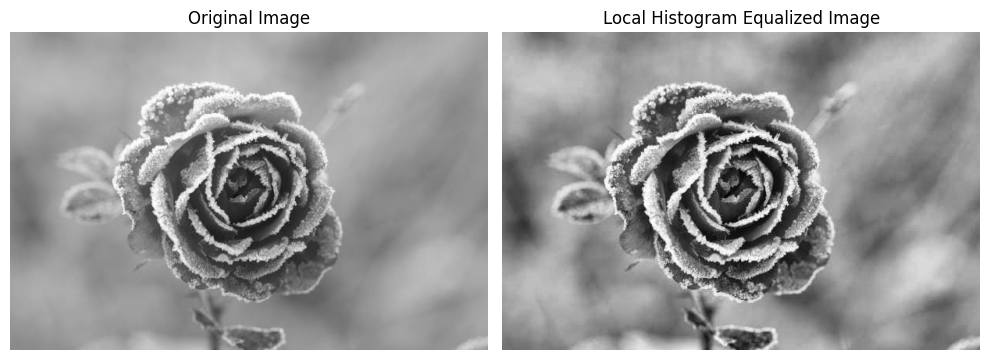

In [13]:
import cv2
import matplotlib.pyplot as plt

def local_histogram_equalization(image_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    try:
        img = cv2.imread(image_path, 0)  # Read in grayscale

        if img is None:
            print(f"Error: Could not open or find the image at '{image_path}'")
            return

        # Create CLAHE object
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        local_equalized_img = clahe.apply(img)

        # Display images using matplotlib
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(local_equalized_img, cmap='gray')
        plt.title("Local Histogram Equalized Image")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")


# Get image path from user input
input_image_path = input("Enter the path to the image file for local histogram equalization: ")

# Call the function to perform local histogram equalization
local_histogram_equalization(input_image_path)


**Question 5**

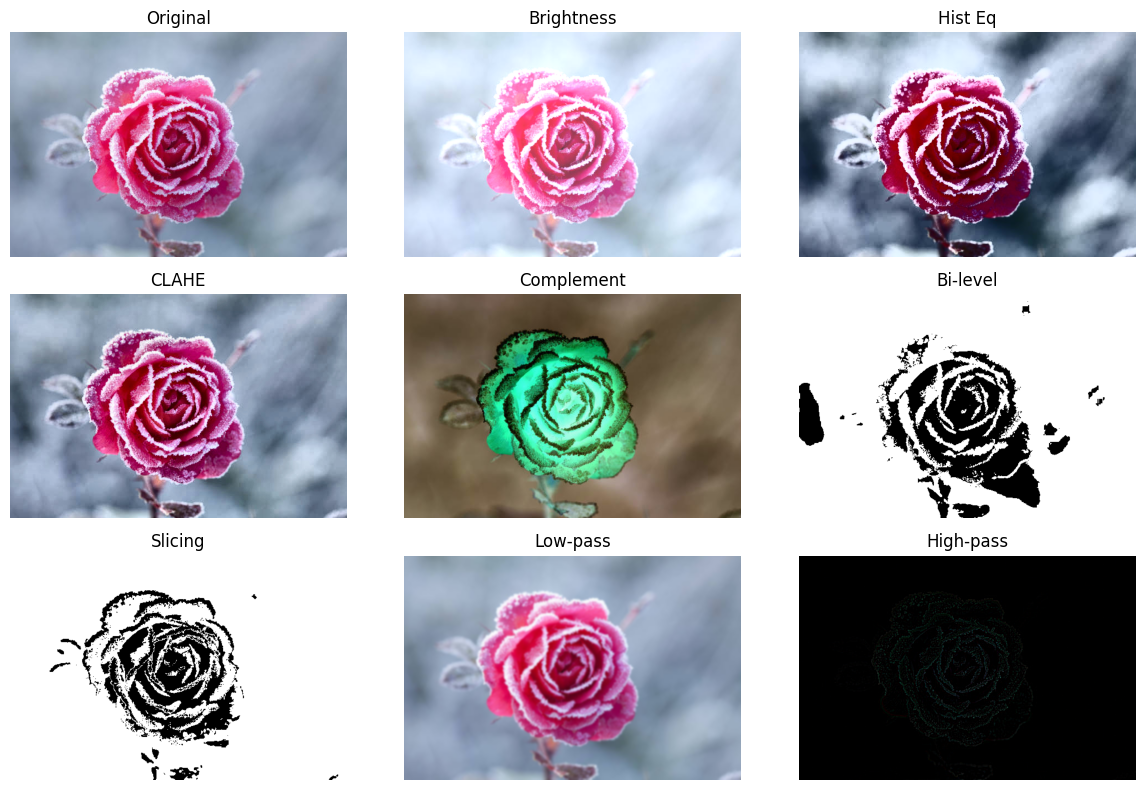

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (Reuse the same functions from before: brightness_enhancement, contrast_enhancement_hist_eq, etc.)

img = cv2.imread("/content/Frozen Rose.jpg")  # replace with your path
if img is None:
    raise FileNotFoundError("Cannot read your_image.jpg")

# apply all
outputs = {
    "Original": img,
    "Brightness": brightness_enhancement(img, beta=60),
    "Hist Eq": contrast_enhancement_hist_eq(img),
    "CLAHE": contrast_enhancement_clahe(img),
    "Complement": complement_image(img),
    "Bi-level": cv2.cvtColor(bilevel_contrast(img), cv2.COLOR_GRAY2BGR),
    "Slicing": cv2.cvtColor(brightness_slicing(img, lower=100, upper=200), cv2.COLOR_GRAY2BGR),
    "Low-pass": low_pass_filter(img, ksize=7),
    "High-pass": high_pass_filter(img, ksize=7),
}

plt.figure(figsize=(12, 8))
for i, (title, im) in enumerate(outputs.items(), 1):
    plt.subplot(3, 3, i)
    if im.ndim == 3:
        disp = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(disp)
    else:
        plt.imshow(im, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()


**Question 6**

Saving Frozen Rose.jpg to Frozen Rose (1).jpg


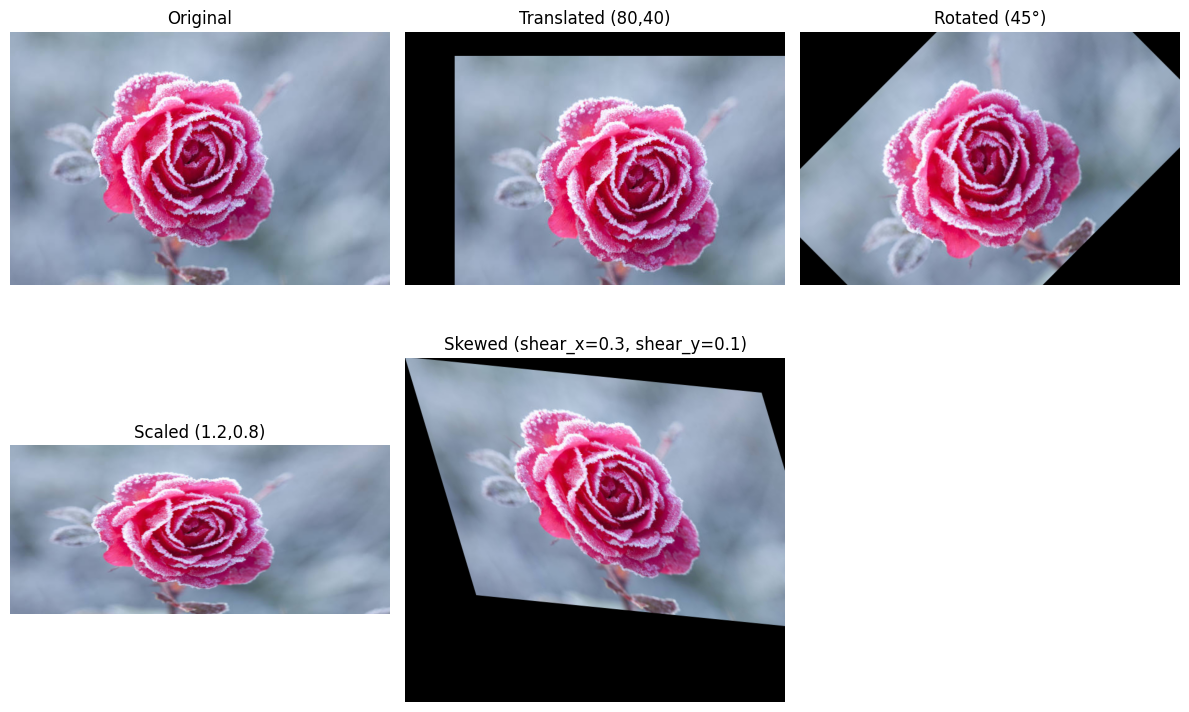

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# Upload image (prompts user to choose a file)
uploaded = files.upload()
if not uploaded:
    raise RuntimeError("No file uploaded.")
# Take first uploaded file
fname = next(iter(uploaded))
file_bytes = BytesIO(uploaded[fname])
file_array = np.frombuffer(file_bytes.read(), dtype=np.uint8)
img = cv2.imdecode(file_array, cv2.IMREAD_COLOR)
if img is None:
    raise RuntimeError(f"Failed to decode uploaded image {fname}.")

# Geometric transformations
def translate(img, tx=50, ty=30):
    rows, cols = img.shape[:2]
    M = np.array([[1, 0, tx],
                  [0, 1, ty]], dtype=np.float32)
    return cv2.warpAffine(img, M, (cols, rows))

def rotate(img, angle=30, center=None, scale=1.0):
    rows, cols = img.shape[:2]
    if center is None:
        center = (cols / 2, rows / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, M, (cols, rows))

def scale_img(img, sx=1.5, sy=0.7):
    rows, cols = img.shape[:2]
    M = np.array([[sx, 0, 0],
                  [0, sy, 0]], dtype=np.float32)
    new_w = int(cols * sx)
    new_h = int(rows * sy)
    return cv2.warpAffine(img, M, (new_w, new_h))

def skew(img, shear_x=0.3, shear_y=0.0):
    rows, cols = img.shape[:2]
    M = np.array([[1, shear_x, 0],
                  [shear_y, 1, 0]], dtype=np.float32)
    new_w = int(cols + abs(shear_y) * rows)
    new_h = int(rows + abs(shear_x) * cols)
    return cv2.warpAffine(img, M, (new_w, new_h))

# Apply with example parameters (you can tweak these)
translated = translate(img, tx=80, ty=40)
rotated = rotate(img, angle=45)
scaled = scale_img(img, sx=1.2, sy=0.8)
skewed = skew(img, shear_x=0.3, shear_y=0.1)

# Display all
def show(images_dict):
    total = len(images_dict)
    cols = 3
    rows = (total + cols - 1) // cols
    plt.figure(figsize=(4 * cols, 4 * rows))
    for i, (title, im) in enumerate(images_dict.items(), 1):
        plt.subplot(rows, cols, i)
        rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show({
    "Original": img,
    "Translated (80,40)": translated,
    "Rotated (45°)": rotated,
    "Scaled (1.2,0.8)": scaled,
    "Skewed (shear_x=0.3, shear_y=0.1)": skewed
})
